<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Elif_Ayar_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# **1) Replicate:** The lesson code

In [0]:
# First, Let's import the tools we need for visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

There are many plot sytle like backgroud setting. Here is the code to check the list.

* plt.style.available

I will use the 'fast' plot style with the matplotlib and pandas.


In [0]:
# 'fast' plot style
plt.style.use('fast')

# Part 1) The Pandas built-in visualization tool

**Continuous vs. categorical variables**

In [223]:
# Load the titanic dataset
url='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic=pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [224]:
titanic['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [225]:
# 'Plcass' is a cabin class and categorical variable.
#  Let's create a new column called 'cabin_class' with string values.
titanic['cabin_class']=titanic['Pclass'].map({1:'First',2:'Second',3:'Third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
439,1,3,female,22.0,7.7750,Southampton,Third
119,0,2,male,42.0,13.0000,Southampton,Second
631,0,2,male,39.0,13.0000,Southampton,Second
422,0,3,female,30.0,8.6625,Southampton,Third
625,1,3,female,18.0,7.4958,Southampton,Third


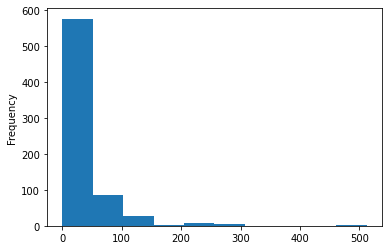

In [226]:
# Let's create a histogram: 'Fare' column
titanic['Fare'].plot(kind='hist');

Mostly fare is between 0 and 150. There are little ticket price between $200-$300. However, there are some outliers which I really need them. So I can remove them 

In [227]:
# Let's remove the values equal and bigger than 500.
titanic=titanic[titanic['Fare']<500]
titanic['Fare'].value_counts().sort_index()

0.0000      7
4.0125      1
5.0000      1
6.2375      1
6.4375      1
           ..
211.5000    1
227.5250    3
247.5208    2
262.3750    2
263.0000    4
Name: Fare, Length: 218, dtype: int64

Thus, maximum value is $263. Great!


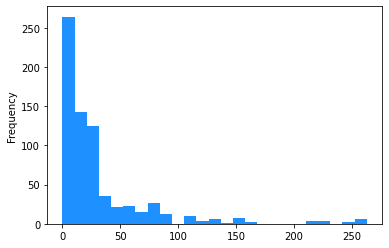

In [228]:
# Histogram
titanic['Fare'].plot(kind='hist', color='dodgerblue', bins=25);

In [229]:
# Continous values can be arranged as categorical variables too.
farelabels=['low','medium','high','vhigh']
titanic['Fare_Groups']=pd.cut(titanic['Fare'], bins=[0,8,15,32,264],
                              labels=farelabels)
titanic[['Fare','Fare_Groups']].sample(3)

,Fare,Fare_Groups
122,8.05,medium
18,13.00,medium
647,24.15,high


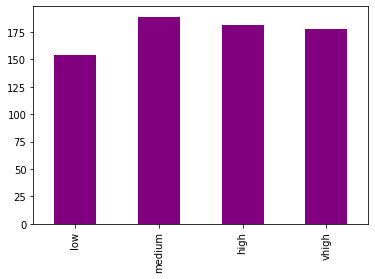

In [230]:
# Let's look at the bar value
titanic['Fare_Groups'].value_counts().sort_index().plot(kind='bar', 
                                                        color='purple');

**Display a single continous variable**

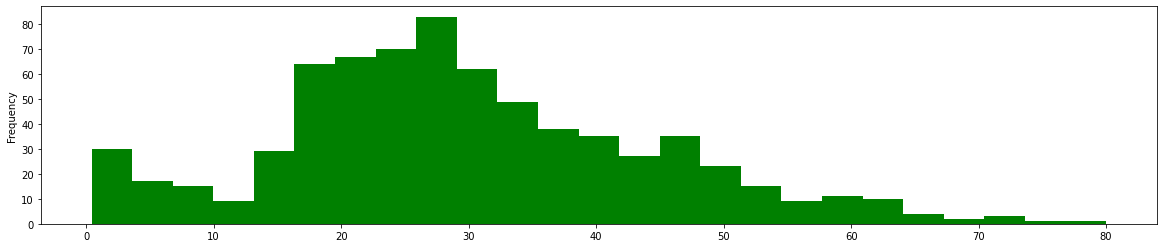

In [247]:
#Histogram
titanic['Age'].plot(kind='hist',
                    bins=25,
                    figsize=(20,4),
                    color='Green');

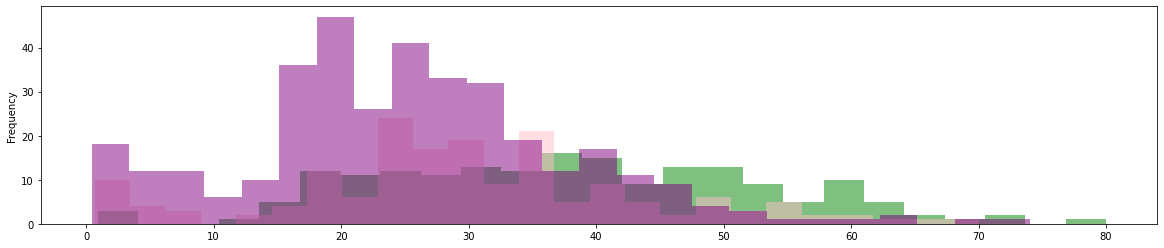

In [250]:
# We can also put different syntax together in the same cell 
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist',bins=25,figsize=(20,4),color='Green', alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist',bins=25,figsize=(20,4),color='Pink', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist',bins=25,figsize=(20,4),color='Purple', alpha=0.5);

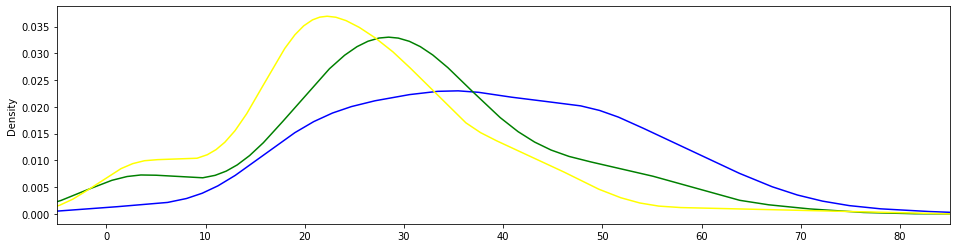

In [259]:
# we can make the similar graphic by using Kernel Density Estimate
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), color='Blue', xlim=(-5, 85));
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4), color='Green', xlim=(-5, 85));
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), color='Yellow', xlim=(-5, 85));

A Single Categorial Variable


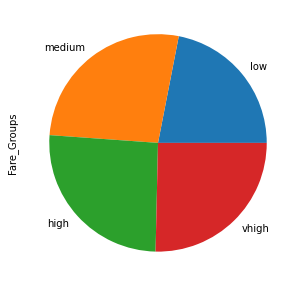

In [261]:
titanic['Fare_Groups'].value_counts().sort_index().plot(kind='pie',figsize=(5,5));

In [264]:
#compare two categorical variables
cab_death1=pd.crosstab(titanic['cabin_class'],titanic['Survived'])
cab_death1

Survived,0,1
cabin_class,,
First,64,117
Second,90,83
Third,270,85


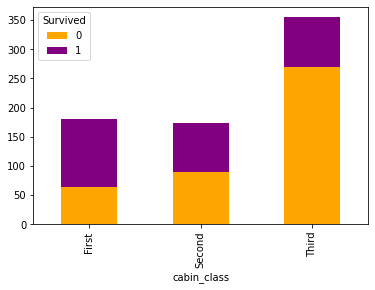

In [265]:
# Chart Bar with Stacked use

cab_death1.plot(kind='bar', stacked=True, color=['Orange',"Purple"]);

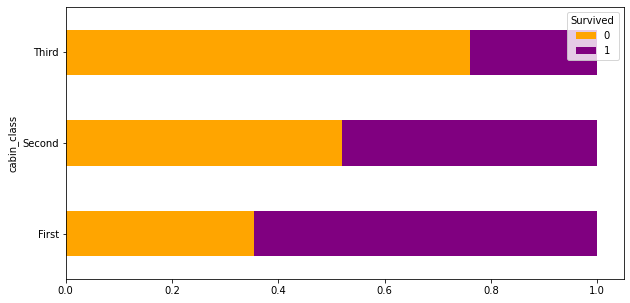

In [269]:
# Percent

cab_death2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='index')
cab_death2.plot(kind='barh', stacked="True", color=['Orange',"Purple"],figsize=(10,5));

One continous vs one Categorical 

In [271]:
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [274]:
# Let's group the ages with Cabin Class
cab_age=titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
First     38.151492
Second    29.877630
Third     25.140620
Name: Age, dtype: float64

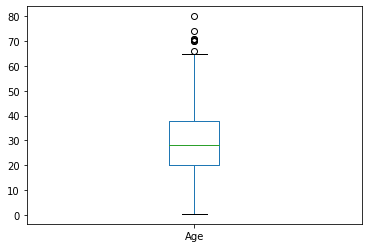

In [276]:
# Use Box method

titanic['Age'].plot(kind='box');

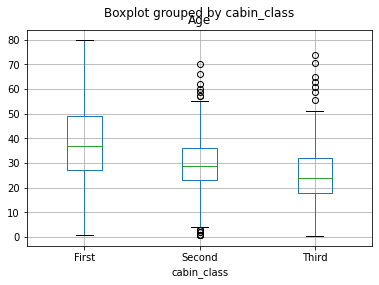

In [277]:
plt.style.use('fast') # This is to change back ground color 
titanic.boxplot(column='Age', by='cabin_class');

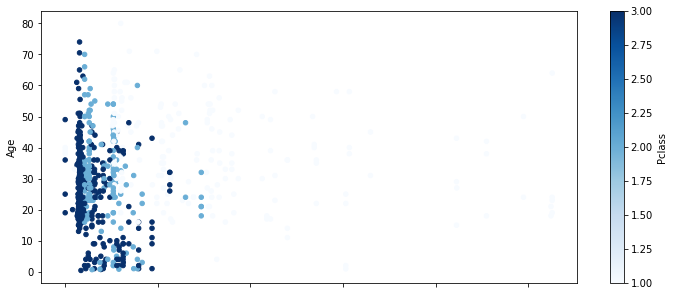

In [280]:
# Two or Three variable

titanic.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='Blues', figsize=(12,5));

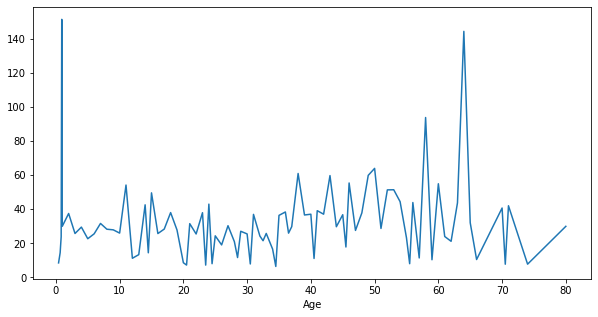

In [282]:
# Line Plot

titanic.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,5));

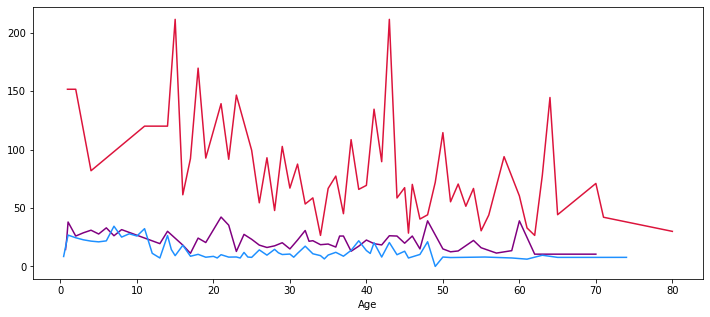

In [286]:
# We can also make three syntax in the same cell by using loop and make graph.

mycolors=['crimson', 'purple', 'dodgerblue']

for x in [1,2,3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,5),
                                                                   color=mycolors[x-1]);

In [288]:
# Correlation
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


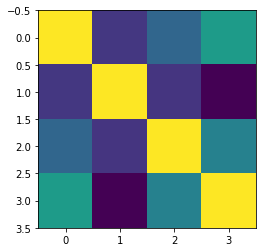

In [290]:
plt.imshow(titanic.corr());


# Intro to Matplotlip

In [292]:
# Two Numpy arrays
x = np.linspace(0, 5 ,11) # (between 0 and 5, create 11 numbers)
y = x**2
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

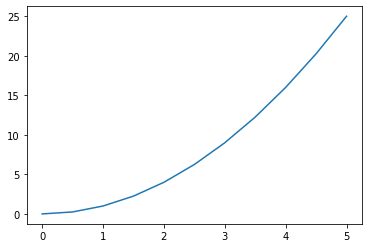

In [293]:
# Basic Matplotlip command
import matplotlib.pyplot as plt
plt.plot(x,y);

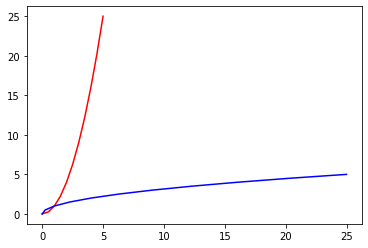

In [294]:
# Two different colors with two plt plots
plt.plot(x,y,'r')
plt.plot(y,x, 'b');

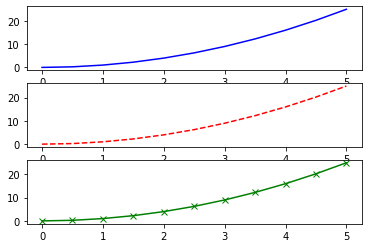

In [304]:
# Multiplot on the same cancav
plt.subplot(3,1,1) # nrows, ncols, plutnumber
plt.plot(x,y,'b');
plt.subplot(3,1,2)
plt.plot(x,y,'r--');
plt.subplot(3,1,3)
plt.plot(x,y,'g-x');

Matplotlib Object Oriented Method

.figure() methods

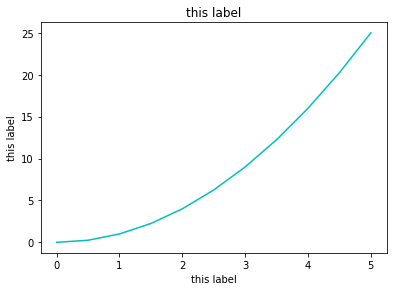

In [307]:
# Empty Cancav
fig = plt.figure()

# Axes left, bottom, width, height (range 0 to 1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

# Plot on that set of axes
ax.plot(x,y,'c')
ax.set_xlabel('this label')
ax.set_ylabel('this label')
ax.set_title('this label');



We moved the last part of the lecture because of time

       Imitate a real world problem


In [308]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [309]:
#load the data
ratings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
ratings.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# convert timestamp column to actual datetime object

ratings['timestamp1'] = pd.to_datetime(ratings['timestamp'])

In [311]:
# Use the timestamp as the unique index identifier 
ratings.set_index('timestamp1', inplace=True, drop=True)
ratings.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [313]:
# Grab to only particular rows
lastday = ratings['2017-08-29']
lastday.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
# Value count and sort
lastday['category'].value_counts().sort_index()

Aged 18-29            140
Aged 30-44            140
Aged 45+              140
Aged under 18         140
Females               140
Females Aged 18-29    140
Females Aged 30-44    140
Females Aged 45+      140
Females under 18      140
IMDb staff            140
IMDb users            140
Males                 140
Males Aged 18-29      140
Males Aged 30-44      140
Males Aged 45+        140
Males under 18        140
Non-US users          140
Top 1000 voters       140
US users              140
Name: category, dtype: int64

In [315]:
# get all IMDb users
lastday_filtered = lastday[lastday['category']=='IMDb users']
lastday_filtered.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [318]:
# Take the last row
final = lastday_filtered.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [319]:
final.T

timestamp1,2017-08-29 23:10:06.218251
timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38


In [322]:
# Take only percent rowws
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct'] # Type each row names
plot_data= final[pct_columns].T
plot_data

timestamp1,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [323]:
#
plot_data.index=range(1,11) # make index to get numeric index
plot_data.columns =['percent'] # Rename the column as percent
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


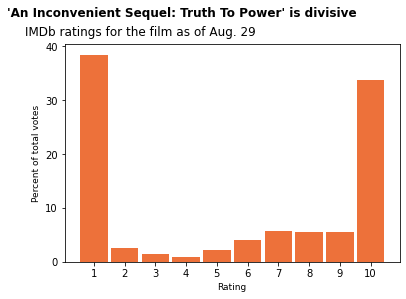

In [324]:
fig, ax = plt.subplots() # fig and ax methods 


fig.patch.set(facecolor="white") # Backgroud color set

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.25, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [325]:
display(example)

Looks same. We are done.

# 2)Reproduce another example from FiveThityEight's shared data repository. 

In [0]:
# import  the all libaries and tool I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


I want to work on 'How Baby Boomers Ger High', and I will reproduce the same graph. Here is the example

In [233]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=1150'
sample= Image(url=url, width=400)

display(sample)

To create the same image, there are a few steps to go over.

1) Look at the data, and create a new dataset consists of Americans aged 50-64.

2) Work on the particular columns.

3) Sort the date as percent values.

4) Use Bar graph to reflect the same image

In [234]:
# Call the dataset 'How Baby Boomers Get High'

Boomers='https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'
Baby_Boomers=pd.read_csv(Boomers)

# Check the first 5 rows and shape
Baby_Boomers.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [235]:
Baby_Boomers.shape

(17, 28)

In [236]:
#Let's look at the age and columns names

Baby_Boomers['age']

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object

In [237]:
Baby_Boomers.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

Based on the data, there are particular row which covers all values for the ages between 50-64. Thus, I want to creat new dataset which will have only one row datas with particular columns.

In [238]:
# Grab only the row age 50-64
Age=Baby_Boomers[Baby_Boomers['age']=='50-64']
Age




,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0


In [239]:
# Choose the columns I need.
drug_used=Age[['marijuana-use','cocaine-use','crack-use',
               'heroin-use','hallucinogen-use','inhalant-use',
               'pain-releiver-use','oxycontin-use','tranquilizer-use',
               'stimulant-use','stimulant-use','sedative-use']]
               
drug_used

,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,stimulant-use,sedative-use
15,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.3,0.2


In [240]:
# Transport all the columns as row.
drug_used2=drug_used.T
drug_used2

,15
marijuana-use,7.3
cocaine-use,0.9
crack-use,0.4
heroin-use,0.1
hallucinogen-use,0.3
inhalant-use,0.2
pain-releiver-use,2.5
oxycontin-use,0.4
tranquilizer-use,1.4
stimulant-use,0.3


In [241]:
# Change the column Name as 'age 50-64'
drug_used2.rename(columns={15: 'Age 50-64'}, inplace=True)
drug_used2.sort_values(by=['Age 50-64'], 
                                   inplace=True, ascending= True)

drug_used2



,Age 50-64
heroin-use,0.1
inhalant-use,0.2
sedative-use,0.2
hallucinogen-use,0.3
stimulant-use,0.3
stimulant-use,0.3
crack-use,0.4
oxycontin-use,0.4
cocaine-use,0.9
tranquilizer-use,1.4


My data looks good and clear. Time to visualize

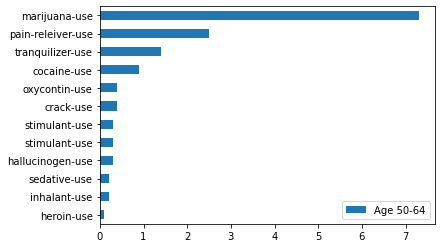

In [242]:
# Use bar 
drug_used2.plot(kind='barh');

In [243]:
display(sample)

I have to play with column orders, bar colors, title, labels , and so on  

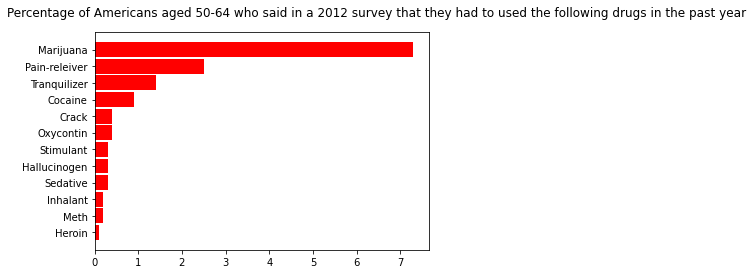

In [244]:
fig, ax = plt.subplots()

# Set the bars
ax.barh(y=('Heroin','Meth','Inhalant','Sedative','Hallucinogen','Stimulant',
           'Oxycontin','Crack','Cocaine','Tranquilizer','Pain-releiver','Marijuana'),
         height=0.9, width=drug_used2['Age 50-64'], 
        color='Red')

# Set the text above the graph

ax.text(s="Percentage of Americans aged 50-64 who said in"+
           " a 2012 survey that they had to used the following drugs in the past year",
          fontsize=12, x=-2, y=13);






# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here